In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this document, we help you understand the training data for Part 2 of the project, for you to use for your demand estimation and pricing model. We also describe the test data (for which you have to do give optimal prices).

The training data is composed of 30000 customers, inside `train_pricing_decisions`.

For every training customer, you have:
1. a price they were offered for each item
2. their decision for what item they purchased. `-1` means they purchased neither item, `0` means they purchased item 0, `1` means they purchased item 1. 
3. three user covariates for each user to aid in personalized pricing. 

In [2]:
train_pricing_decisions = pd.read_csv('train_prices_decisions.csv')
test_user_info = pd.read_csv('test_user_info.csv')

In [3]:
train_pricing_decisions.head()

,user_index,Covariate1,Covariate2,Covariate3,price_item_0,price_item_1,item_bought
0,0,4.319065,4.917636,6.054873,1.659785,3.598304,0
1,1,6.375840,7.228608,1.324521,13.120469,2.578281,1
2,2,1.524010,0.393772,4.873626,27.145855,4.538328,-1
3,3,1.243759,1.651083,2.268083,5.275166,14.818790,0
4,4,2.510326,8.265984,4.602699,12.681638,6.809336,0


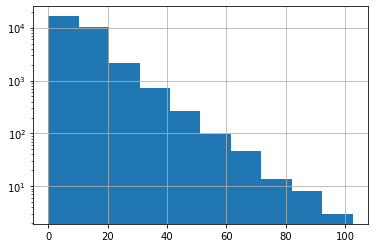

In [7]:
train_pricing_decisions.price_item_0.hist()
plt.yscale('log')

The following plot shows the "1-dimensional" choice for item 0: how the percentage of people who bought item 0 changes with the item 0 price.

<AxesSubplot:xlabel='price_item_0'>

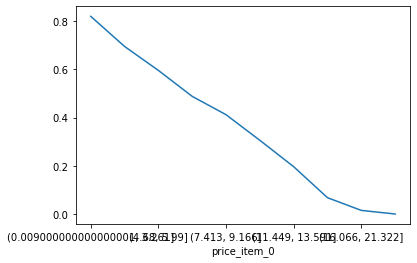

In [8]:
train_pricing_decisions.groupby(pd.qcut(train_pricing_decisions.price_item_0, 10))['item_bought'].agg(lambda x: np.mean([y==0 for y in x])).plot(kind='line')

Of course, the price for item 0 also affects the percentage of people who bought item 1:

<AxesSubplot:xlabel='price_item_0'>

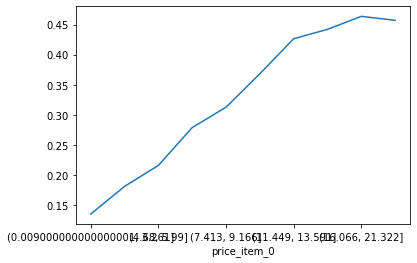

In [9]:
train_pricing_decisions.groupby(pd.qcut(train_pricing_decisions.price_item_0, 10))['item_bought'].agg(lambda x: np.mean([y==1 for y in x])).plot(kind='line')

The test data just has user covariates. Your job is to calculate prices for each item so as to maximize expected revenue from that customer, as you did in Homework 3 (but now with 2 items instead of just 1)

In [10]:
test_user_info.head()

,user_index,Covariate1,Covariate2,Covariate3
0,30000,5.290482,4.597224,2.616371
1,30001,8.069435,0.308068,2.910754
2,30002,2.117773,1.527354,1.320430
3,30003,6.828597,3.455275,0.769989
4,30004,0.012091,3.873894,1.250743


You will be asked to submit a CSV with your calculated optimal prices for each test customer.  The CSV should have four columns: (1) user_index, (2) price_item_0, (3) price_item_1, and (4) expected_revenue. The file should be named `part2_static_prices_submission.csv`